# １次元セル・オートマトンの作成

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
u = np.array([[4], [2], [1]])

In [3]:
def step(x, rule_binary):
    """Compute a single stet of elementary cellular automaton"""
    # The columns contain the L, C, R values of all cells.
    y = np.vstack((np.roll(x, 1), x, np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_binary[7-z]

In [5]:
def generate(rule, size=80, steps=80):
    """Simulate an elementary cellular automaton given its rule(number between 0 and 255)"""
    # Compute the binary representation of the rule.
    rule_binary = np.array([int(x) for x in np.binary_repr(rule, 8)], dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0,:] = np.random.rand(size) < .5
    # Apply the step function iteratively.
    for i in range(steps-1):
        x[i+1,:] = step(x[i,:], rule_binary)
    return x

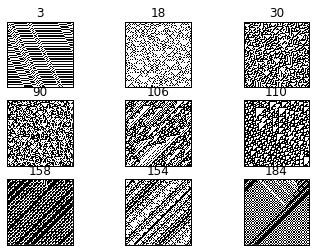

In [7]:
rules = [3, 18, 30, 90, 106, 110, 158, 154, 184]
for i, rule in enumerate(rules):
    x = generate(rule)
    plt.subplot(331+i)
    plt.imshow(x, interpolation='none', cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([])
    plt.title(str(rule))